# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [3]:
# load some dataset
# for example, here we load BARPA rainfall data
ds_pr = xr.open_dataset("/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/bias-adjustment-input/AGCD-05i/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/pr/pr_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_201501-201512.nc")
ds_pr


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 365, lat: 691, lon: 886, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2015-01-01T12:00:00 ... 2015-12-31T1...
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float64 2GB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
Attributes: (12/47)
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               DD
    title:                     Pre-processed model output in preparation for ...
    source:                    ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i1p...
    source_type:               ARCM
    project:                   BARPA
    ...                        ...
    acknowledgement:           The production of BARPA was supported with fun...
    driving_experiment:        CSIRO-ARCCSS ACCESS-CM2; ssp370; r4i1p1f1
    driving_source_id:         ACCESS-CM2
    input_tracking_id:         62d5d07a-7da8-4bab-b5dc-ba08231c073d
    history:                   Thu Apr 11 17:20:40 2024: ncatted -O -a least_...
    NCO:                       netCDF Operators version 5.0.5 (Homepage = htt...

In [4]:
# Calculate a 2D mappable data array
# this will be a mean, sum, median, percentile, min, max etc that will summarise the data in some way
# eg annual total rainfall
da_pr_ann = ds_pr.sum(dim="time").pr
da_pr_ann

<xarray.DataArray 'pr' (lat: 691, lon: 886)> Size: 5MB
array([[1154.9375   , 1154.921875 , 1154.8671875, ..., 1099.8515625,
        1099.078125 , 1087.7890625],
       [1153.0625   , 1151.8828125, 1150.46875  , ..., 1102.0546875,
        1102.25     , 1091.0390625],
       [1148.3984375, 1145.84375  , 1143.375    , ..., 1089.3046875,
        1092.21875  , 1088.4921875],
       ...,
       [2418.78125  , 2457.4453125, 2495.9921875, ..., 2936.875    ,
        2952.28125  , 2981.1328125],
       [2456.234375 , 2483.015625 , 2509.8203125, ..., 2964.0390625,
        2982.546875 , 3017.765625 ],
       [2494.25     , 2510.0234375, 2525.984375 , ..., 2991.6796875,
        3013.2109375, 3053.1328125]])
Coordinates:
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2

# Step 3 - Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.

There are quite a few options to modify this plotting. At a minimum, you will need:
 - **data**, a 2D xarray.DataArray of your hazard
 - **regions**, use the regions_dict to access region or state boundary shape data
 - **title**, title of plot naming the index or hazard you are plotting
 - **date_range**, date range of the data you have plotted, appears as a subtitle under the title
 - **cmap**, use the cmap_dict to access a range of recommended colormaps
 - **ticks**, use the tick_dict to access a range of useful ranges or input your own list or array
 - **cbar_label**, is the label for the colorbar. Give name and unit
 - **cbar_extend**, controls the arrows of the colorbar. Indicates that values beyond the colorbar are possible. Use 'neither' for finite ranges eg deciles. Use 'both' for anomalies or temperatures. Use 'max' for total rainfall, where negative values are not possible, but very large positive values are possible. "min" is also an option.
 - **dataset_name**, name of the data source eg "AGCD v2", "BARPA-R ACCESS-CM2"
 - (**baseline**, If plotting anomalies, give the base period as a string, eg "1961-1990")

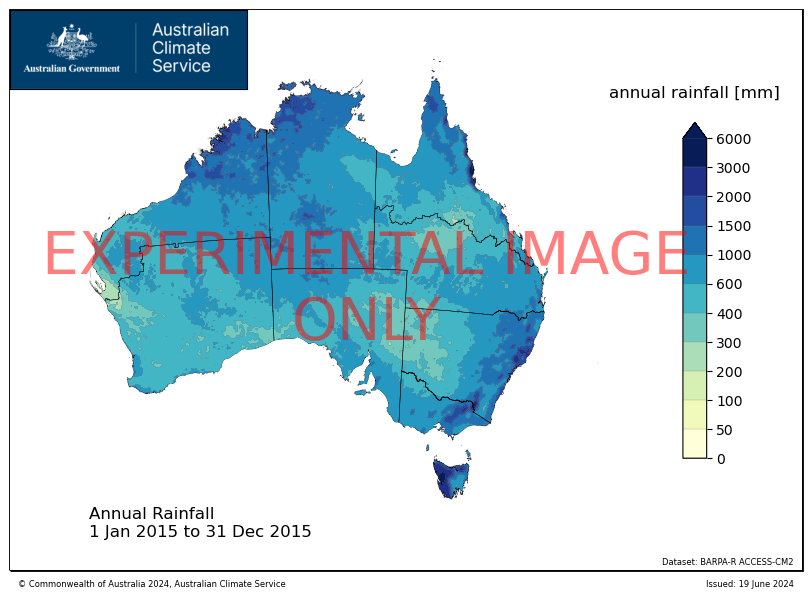

In [5]:
# Annual cumulative Rainfall
plot_acs_hazard(data = da_pr_ann,
                regions = regions_dict['ncra_regions'],
                title = "Annual Rainfall",
                date_range = "1 Jan 2015 to 31 Dec 2015",
                cmap = cmap_dict["pr"],
                ticks = tick_dict['pr_annual'],
                cbar_label = "annual rainfall [mm]",
                cbar_extend = "max",                
                dataset_name = "BARPA-R ACCESS-CM2",
                outfile = "figures/out.png");

# Access the docstring for more info

In [6]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='aus_states_territories',
    regions=None,
    data=None,
    mask_not_australia=True,
    facecolor=None,
    edgecolor='black',
    figsize=(8, 6),
    title=None,
    date_range='',
    crs=None,
    area_linewidth=0.3,
    xlim=(110, 170),
    ylim=(-45, -5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x14f312a419c0>,
    cbar_extend='neither',
    ticks=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=True,
    contour=True,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL IMAGE ONLY',
    infile=None,
    outfile=None,
)
Docstring:
This function takes a name of an Australian shapefile collection for data in /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/ and hazard data from a 2D Xarray data array
and plots the data on a map of Australia with the shape outlines. 

Parameters
----------
name: str
    name of a shapefile c